In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv

In [2]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()
    
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:

# 1. symboling: -3, -2, -1, 0, 1, 2, 3.
# 2. normalized-losses: continuous from 65 to 256.
# 3. make:
# alfa-romero, audi, bmw, chevrolet, dodge, honda,
# isuzu, jaguar, mazda, mercedes-benz, mercury,
# mitsubishi, nissan, peugot, plymouth, porsche,
# renault, saab, subaru, toyota, volkswagen, volvo

# 4. fuel-type: diesel, gas.
# 5. aspiration: std, turbo.
# 6. num-of-doors: four, two.
# 7. body-style: hardtop, wagon, sedan, hatchback, convertible.
# 8. drive-wheels: 4wd, fwd, rwd.
# 9. engine-location: front, rear.
# 10. wheel-base: continuous from 86.6 120.9.
# 11. length: continuous from 141.1 to 208.1.
# 12. width: continuous from 60.3 to 72.3.
# 13. height: continuous from 47.8 to 59.8.
# 14. curb-weight: continuous from 1488 to 4066.
# 15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
# 16. num-of-cylinders: eight, five, four, six, three, twelve, two.
# 17. engine-size: continuous from 61 to 326.
# 18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
# 19. bore: continuous from 2.54 to 3.94.
# 20. stroke: continuous from 2.07 to 4.17.
# 21. compression-ratio: continuous from 7 to 23.
# 22. horsepower: continuous from 48 to 288.
# 23. peak-rpm: continuous from 4150 to 6600.
# 24. city-mpg: continuous from 13 to 49.
# 25. highway-mpg: continuous from 16 to 54.
# 26. price: continuous from 5118 to 45400

In [4]:
with open('imports-85.data.txt') as input_file:
    lines = input_file.readlines()
    newLines = []
    for line in lines:
        newLine = line.strip().split()
        newLines.append( newLine )



In [5]:
header = 'symboling normalized-losses make fuel-type aspiration num-of-doors body-style drive-wheels engine-location wheel-base length width height curb-weight engine-type num-of-cylinders engine-size fuel-system bore stroke compression-ratio horsepower peak-rpm city-mpg highway-mpg price'

header = header.split()

In [6]:
file = open('data.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)

In [7]:
for to_append in newLines:
    file = open('data.csv', 'a', newline='')
    with file:
        writer = csv.writer(file, dialect='excel')
        writer.writerow(to_append[0].split(','))

In [8]:
df = pd.read_csv('data.csv')

In [9]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-nul

In [11]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [12]:
for col in df.columns:
    df[col] = df[col].apply(lambda x: np.nan if x=='?' else x)

In [13]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [14]:
df['symboling']=df['symboling'].astype(object)
df['bore'] = df['bore'].apply(pd.to_numeric)
df['stroke'] = df['stroke'].apply(pd.to_numeric)
df['normalized-losses'] = df['normalized-losses'].apply(pd.to_numeric)
df['peak-rpm'] = df['peak-rpm'].apply(pd.to_numeric)
df['horsepower'] = df['horsepower'].apply(pd.to_numeric)
df['price'] = df['price'].apply(pd.to_numeric)


In [15]:
correlation = df.corr()

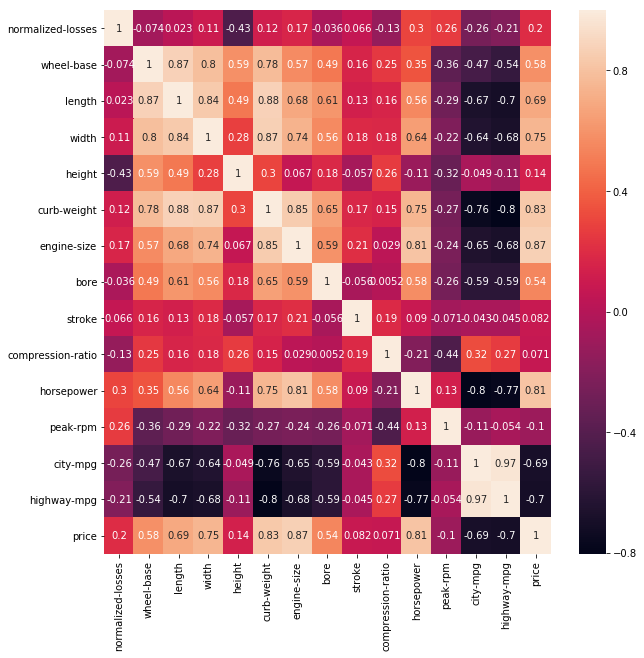

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,annot=True)

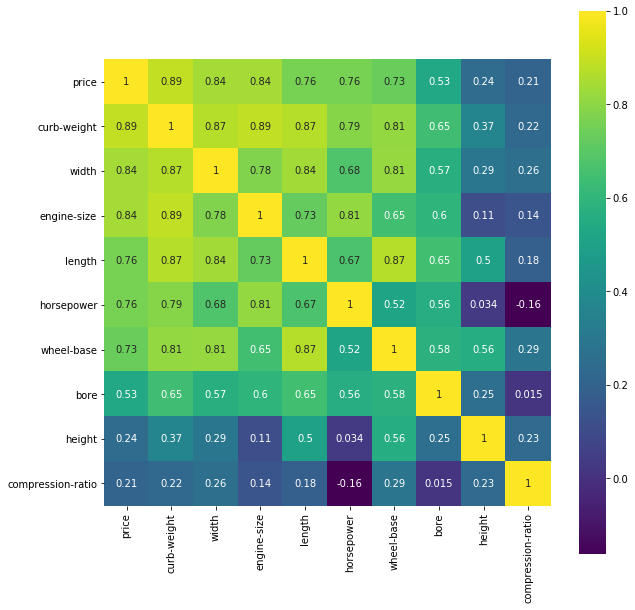

In [17]:
#cmap = sns.cm.viridis_r
correlation = df.dropna().corr()
cols = correlation.nlargest(10,'price')['price'].index
plt.figure(figsize=(10,10))
cm = np.corrcoef(df.dropna()[cols].values.T)
hm = sns.heatmap(cm,cbar = True,annot=True,square = True,yticklabels=cols.values,xticklabels=cols.values,cmap='viridis')

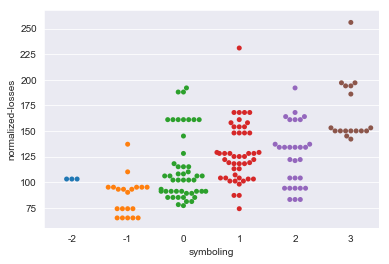

In [18]:
sns.set_style('darkgrid')
sns.swarmplot(x=df['symboling'],y=df['normalized-losses'])

In [19]:
grouped = df.groupby('symboling')

In [20]:
grouped['normalized-losses'].mean()

symboling
-2    103.000000
-1     85.600000
 0    113.166667
 1    128.574468
 2    125.689655
 3    168.647059
Name: normalized-losses, dtype: float64

In [21]:
df['normalized-losses'] = df.groupby('symboling')['normalized-losses'].transform(lambda x: x.fillna(round(x.mean(),1)))

In [22]:
df_sel = df.dropna()

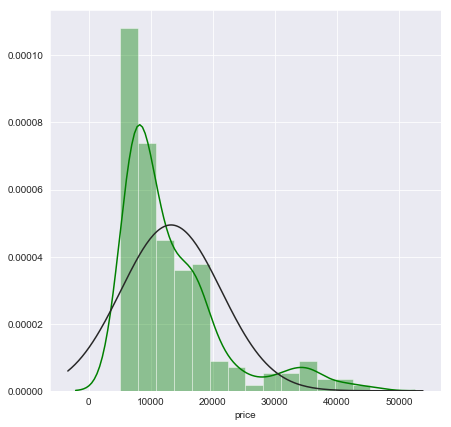

In [23]:
from scipy.stats import norm
plt.figure(figsize=(7,7))

sns.distplot(df_sel['price'],color='g',fit=norm)

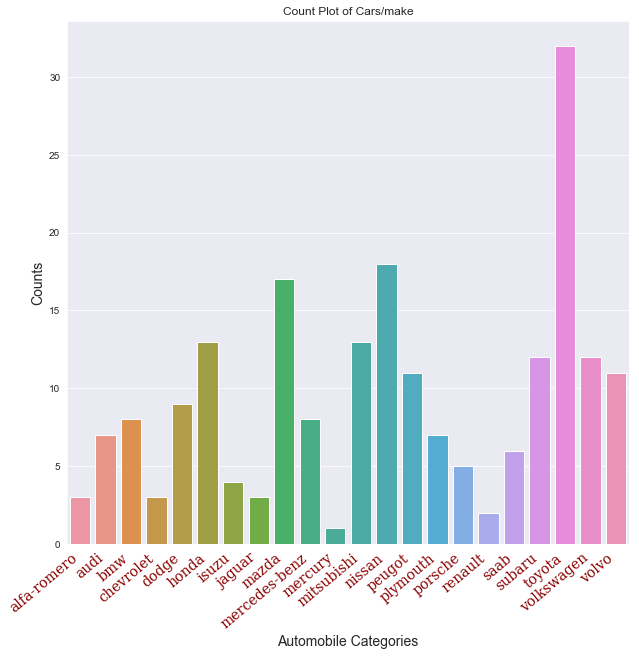

In [24]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 14,
        }


plt.figure(figsize=(9,9))
ax = sns.countplot(x="make", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",fontdict=font)
plt.tight_layout()
plt.xlabel('Automobile Categories',fontdict={'size':14})
plt.ylabel('Counts',fontdict={'size':14})
plt.title('Count Plot of Cars/make')

plt.show()


Text(-6.95,0.5,'Price')

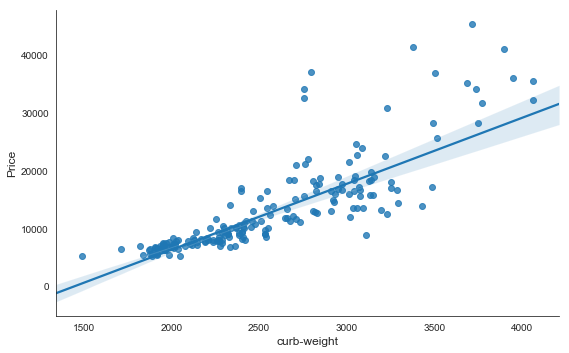

In [25]:
sns.set_style("white")
sns.lmplot(y="price", x="curb-weight", data=df_sel,
          height=5, aspect=1.6, robust=True, palette='tab10')
plt.xlabel('curb-weight',fontdict = {'size':12})
plt.ylabel('Price',fontdict = {'size':12})

Text(-6.95,0.5,'Price')

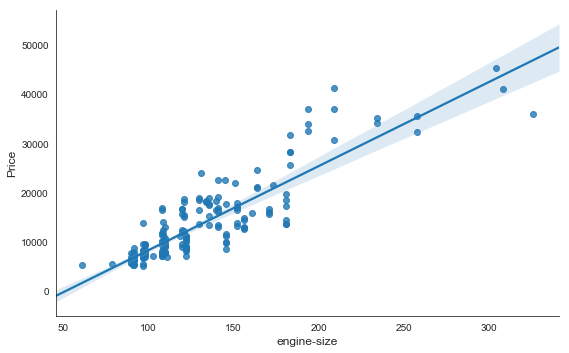

In [26]:
sns.set_style("white")
sns.lmplot(y="price", x="engine-size", data=df_sel,
          height=5, aspect=1.6, robust=True, palette='tab10')
plt.xlabel('engine-size',fontdict = {'size':12})
plt.ylabel('Price',fontdict = {'size':12})

Text(-6.95,0.5,'Price')

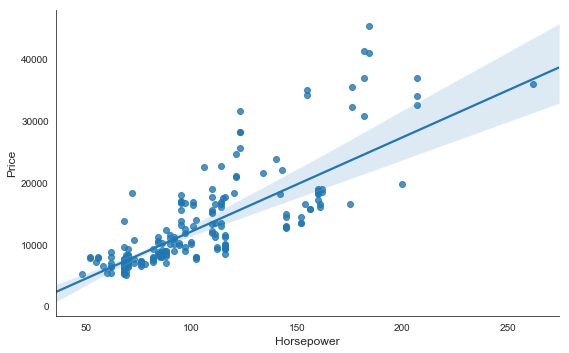

In [27]:
sns.set_style("white")
sns.lmplot(y="price", x="horsepower", data=df_sel,
          height=5, aspect=1.6, robust=True, palette='tab10')
plt.xlabel('Horsepower',fontdict = {'size':12})
plt.ylabel('Price',fontdict = {'size':12})

Text(0.5,0,'width')

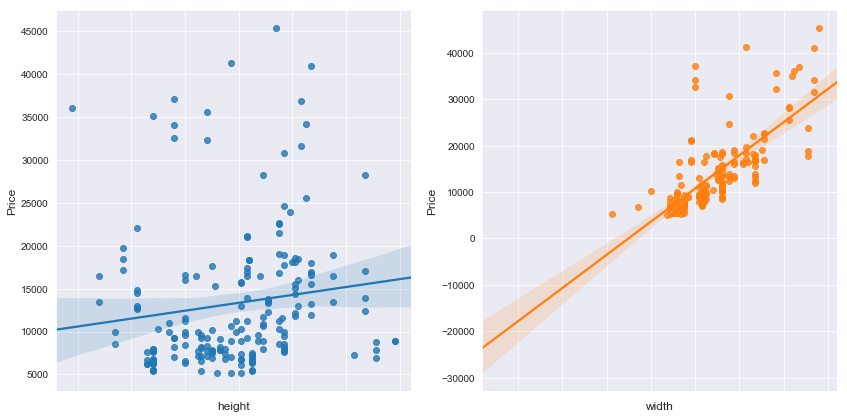

In [28]:
sns.set_style('darkgrid')
columns = ['body-style','engine-type','fuel-system']
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(14, 7))

sns.regplot(y='price', x= 'height', data=df_sel , ax=ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), ha="right",fontdict={'size':11})
ax[0].set_ylabel('Price',fontdict={'size':12})
ax[0].set_xlabel('height',fontdict={'size':12})

sns.regplot(y='price', x= 'width', data=df_sel , ax=ax[1])
ax[1].set_xticklabels(ax[0].get_xticklabels(), ha="right",fontdict={'size':11})
ax[1].set_ylabel('Price',fontdict={'size':12})
ax[1].set_xlabel('width',fontdict={'size':12})


Text(0.5,0,'fuel-system')

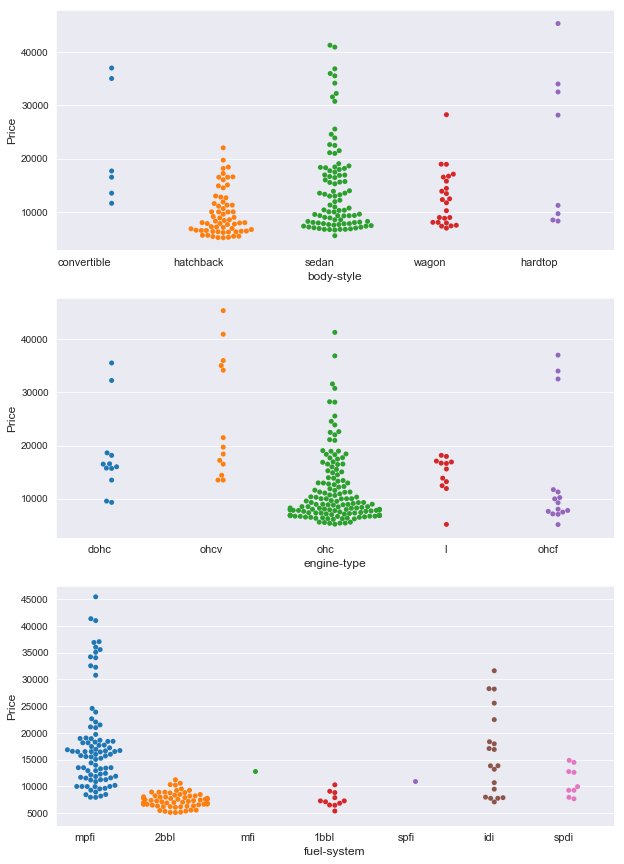

In [29]:
sns.set_style('darkgrid')
#columns = ['body-style','engine-type','fuel-system']
fig, ax = plt.subplots(nrows=3, ncols=1,figsize=(10, 15))

sns.swarmplot(y='price', x= 'body-style', data=df_sel , ax=ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), ha="right",fontdict={'size':11})
ax[0].set_ylabel('Price',fontdict={'size':12})
ax[0].set_xlabel('body-style',fontdict={'size':12})

sns.swarmplot(y='price', x= 'engine-type', data=df_sel , ax=ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(), ha="right",fontdict={'size':11})
ax[1].set_ylabel('Price',fontdict={'size':12})
ax[1].set_xlabel('engine-type',fontdict={'size':12})

sns.swarmplot(y='price', x= 'fuel-system', data=df_sel , ax=ax[2],)
ax[2].set_xticklabels(ax[2].get_xticklabels(), ha="right",fontdict={'size':11})
ax[2].set_ylabel('Price',fontdict={'size':12})
ax[2].set_xlabel('fuel-system',fontdict={'size':12})


In [30]:
df['make'].value_counts()

toyota           32
nissan           18
mazda            17
honda            13
mitsubishi       13
subaru           12
volkswagen       12
volvo            11
peugot           11
dodge             9
bmw               8
mercedes-benz     8
plymouth          7
audi              7
saab              6
porsche           5
isuzu             4
chevrolet         3
jaguar            3
alfa-romero       3
renault           2
mercury           1
Name: make, dtype: int64

In [31]:
grouped = df.groupby('body-style')

In [32]:
grouped['num-of-doors'].value_counts()

body-style   num-of-doors
convertible  two              6
hardtop      two              8
hatchback    two             60
             four            10
sedan        four            79
             two             15
wagon        four            25
Name: num-of-doors, dtype: int64

In [33]:
df[df['num-of-doors'].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
27,1,148.0,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558.0
63,0,113.2,mazda,diesel,std,NaN,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795.0


In [34]:
for i in range(0,len(df)):
    if pd.isnull(df.loc[i,'num-of-doors']):
        df.loc[i,'num-of-doors'] = grouped.get_group(df.loc[i,'body-style'])['num-of-doors'].value_counts().index[0]


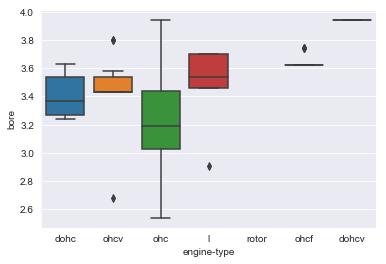

In [35]:
sns.boxplot(x=df['engine-type'],y=df['bore'])

In [36]:
grouped = df.groupby('engine-type')

In [37]:
grouped['bore'].mean()

engine-type
dohc     3.403333
dohcv    3.940000
l        3.526667
ohc      3.260946
ohcf     3.644000
ohcv     3.453846
rotor         NaN
Name: bore, dtype: float64

In [38]:
df[df['engine-type']=='rotor']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
55,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,10945.0
56,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,11845.0
57,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,13645.0
58,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,80,mpfi,NaN,NaN,9.4,135.0,6000.0,16,23,15645.0


In [39]:
df['bore'] = df['bore'].fillna(round(df['bore'].mean(),2))
df['stroke'] = df['stroke'].fillna(round(df['stroke'].mean(),2))

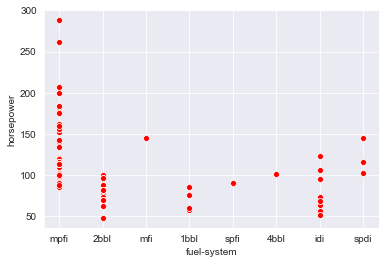

In [40]:
sns.scatterplot(x=df['fuel-system'],y=df['horsepower'],color='r')

In [41]:
df['horsepower'] = df.groupby('fuel-system')['horsepower'].transform(lambda x: x.fillna(round(x.mean(),1)))

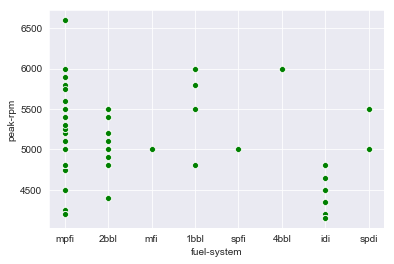

In [42]:
sns.scatterplot(x=df['fuel-system'],y=df['peak-rpm'],color='g')

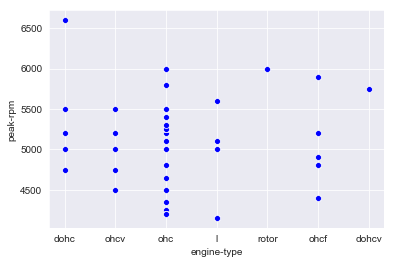

In [43]:
sns.scatterplot(x=df['engine-type'],y=df['peak-rpm'],color='b')

In [44]:
df[df['peak-rpm'].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
130,0,113.2,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,131.9,NaN,23,31,9295.0
131,2,125.7,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,131.9,NaN,23,31,9895.0


In [45]:
df['peak-rpm'] = df.groupby('fuel-system')['peak-rpm'].transform(lambda x: x.fillna(round(x.mean(),1)))

In [46]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,168.6,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,168.6,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,128.6,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [47]:
cols = df.dtypes[df.dtypes != "object"].index

In [48]:
df[cols]

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,168.6,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,168.6,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,128.6,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,95.0,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,95.0,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,95.0,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,95.0,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [49]:
from scipy.stats import skew

In [50]:
skewed_feats = df[cols].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

In [51]:
skewed_feats

compression-ratio    2.591720
engine-size          1.933375
price                1.796142
horsepower           1.360551
wheel-base           1.042514
width                0.897375
normalized-losses    0.703525
curb-weight          0.676402
city-mpg             0.658838
highway-mpg          0.536038
length               0.154810
peak-rpm             0.068176
height               0.062660
bore                 0.020009
stroke              -0.685579
dtype: float64

In [52]:
skewed = skewed_feats[skewed_feats>0.70].index

In [54]:
for skewd_column in skewed:
    df[skewd_column] = np.log(df[skewd_column]+0.00001)
    

In [55]:
df = pd.get_dummies(df)

In [56]:
df_price_null = df[df['price'].isnull()]
df.drop(df_price_null.index,inplace=True)

In [57]:
X = df.drop(['price'],axis=1)
y = df['price']

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [59]:
df

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,...,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,5.127529,4.484132,168.8,4.160445,48.8,2548,4.867535,3.47,2.68,2.197226,...,0,0,0,0,0,0,0,1,0,0
1,5.127529,4.484132,168.8,4.160445,48.8,2548,4.867535,3.47,2.68,2.197226,...,0,0,0,0,0,0,0,1,0,0
2,4.856707,4.548600,171.2,4.182050,52.4,2823,5.023881,2.68,3.47,2.197226,...,0,0,0,0,0,0,0,1,0,0
3,5.099866,4.603168,176.6,4.192681,54.3,2337,4.691348,3.19,3.40,2.302586,...,0,0,0,0,0,0,0,1,0,0
4,5.099866,4.599152,176.6,4.195697,54.3,2824,4.912655,3.19,3.40,2.079443,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,4.553877,4.692265,188.8,4.232656,55.5,2952,4.948760,3.78,3.15,2.251293,...,0,0,0,0,0,0,0,1,0,0
201,4.553877,4.692265,188.8,4.231204,55.5,3049,4.948760,3.78,3.15,2.163324,...,0,0,0,0,0,0,0,1,0,0
202,4.553877,4.692265,188.8,4.232656,55.5,3012,5.153292,3.58,2.87,2.174753,...,0,0,0,0,0,0,0,1,0,0
203,4.553877,4.692265,188.8,4.232656,55.5,3217,4.976734,3.01,3.40,3.135495,...,0,0,0,0,0,1,0,0,0,0


In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [61]:
score = model.score(X_test,y_test)
rmse_log = np.sqrt(mean_squared_error(y_test,y_pred))  ## MSE of log transformed values
rmse_orignal = np.sqrt(mean_squared_error(np.exp(y_test),np.exp(y_pred)))   ## RMSE after tranforming log transformed values to its orignal

print("Score : {0:.2f}".format(score))
print("Root Mean Squared Error of Log transformed Ages of Test Set : {0:.2f}".format(rmse_log))
print("Root Mean Squared Error of Ages of Test Set : {0:.2f}".format(rmse_orignal))


Score : 0.95
Root Mean Squared Error of Log transformed Ages of Test Set : 0.14
Root Mean Squared Error of Ages of Test Set : 3051.50


In [62]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X_train)
X_test_poly = poly_reg.transform(X_test)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)
y_pred = pol_reg.predict(X_test_poly)


score = pol_reg.score(X_test_poly,y_test)
rmse_log = np.sqrt(mean_squared_error(y_test,y_pred))  ## MSE of log transformed values
rmse_orignal = np.sqrt(mean_squared_error(np.exp(y_test),np.exp(y_pred)))   ## RMSE after tranforming log transformed values to its orignal

print("Score : {0:.2f}".format(score))
print("Root Mean Squared Error of Log transformed Ages of Test Set : {0:.2f}".format(rmse_log))
print("Root Mean Squared Error of Ages of Test Set : {0:.2f}".format(rmse_orignal))



Score : -93.45
Root Mean Squared Error of Log transformed Ages of Test Set : 5.90
Root Mean Squared Error of Ages of Test Set : 554916442682983.62


In [63]:
from sklearn.linear_model import LassoCV
reg = LassoCV(cv=5, random_state=0).fit(X_train, y_train)
y_pred = reg.predict(X_test)

score = reg.score(X_test,y_test)
rmse_log = np.sqrt(mean_squared_error(y_test,y_pred))  ## MSE of log transformed values
rmse_orignal = np.sqrt(mean_squared_error(np.exp(y_test),np.exp(y_pred)))   ## RMSE after tranforming log transformed values to its orignal

print("Score : {0:.2f}".format(score))
print("Root Mean Squared Error of Log transformed Ages of Test Set : {0:.2f}".format(rmse_log))
print("Root Mean Squared Error of Ages of Test Set : {0:.2f}".format(rmse_orignal))


Score : 0.83
Root Mean Squared Error of Log transformed Ages of Test Set : 0.25
Root Mean Squared Error of Ages of Test Set : 5528.76


In [64]:
from sklearn.kernel_ridge import KernelRidge

KRR = KernelRidge(alpha=100, kernel='polynomial', degree=2, coef0=2.5)
KRR.fit(X_train,y_train)
y_pred = KRR.predict(X_test)

score = model.score(X_test,y_test)
rmse_log = np.sqrt(mean_squared_error(y_test,y_pred))  ## MSE of log transformed values
rmse_orignal = np.sqrt(mean_squared_error(np.exp(y_test),np.exp(y_pred)))   ## RMSE after tranforming log transformed values to its orignal

print("Score : {0:.2f}".format(score))
print("Root Mean Squared Error of Log transformed Ages of Test Set : {0:.2f}".format(rmse_log))
print("Root Mean Squared Error of Ages of Test Set : {0:.2f}".format(rmse_orignal))



Score : 0.95
Root Mean Squared Error of Log transformed Ages of Test Set : 0.18
Root Mean Squared Error of Ages of Test Set : 4557.71


In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [66]:
random_forest = RandomForestRegressor(n_estimators=10)

In [67]:
random_forest.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [68]:
y_pred = random_forest.predict(X_test)

score = model.score(X_test,y_test)
rmse_log = np.sqrt(mean_squared_error(y_test,y_pred))  ## MSE of log transformed values
rmse_orignal = np.sqrt(mean_squared_error(np.exp(y_test),np.exp(y_pred)))   ## RMSE after tranforming log transformed values to its orignal

print("Score : {0:.2f}".format(score))
print("Root Mean Squared Error of Log transformed Ages of Test Set : {0:.2f}".format(rmse_log))
print("Root Mean Squared Error of Ages of Test Set : {0:.2f}".format(rmse_orignal))


Score : 0.95
Root Mean Squared Error of Log transformed Ages of Test Set : 0.15
Root Mean Squared Error of Ages of Test Set : 2954.82


In [69]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 20)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]


random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [70]:
rf = RandomForestRegressor()

In [71]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = 1)

In [72]:
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=171, min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=171, min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.1s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



[CV] n_estimators=171, min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=171, min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.1s
[CV] n_estimators=171, min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=171, min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.1s
[CV] n_estimators=114, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=25 
[CV]  n_estimators=114, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=25, total=   0.1s
[CV] n_estimators=114, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=25 
[CV]  n_estimators=114, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=25, total=   0.1s
[CV] n_estimators=114, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=25 
[CV]  n_estimators=114, min_samples_split=15, min_samples

[CV]  n_estimators=152, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=15, total=   0.1s
[CV] n_estimators=152, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=15 
[CV]  n_estimators=152, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=15, total=   0.1s
[CV] n_estimators=86, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=5 
[CV]  n_estimators=86, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=5, total=   0.0s
[CV] n_estimators=86, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=5 
[CV]  n_estimators=86, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=5, total=   0.0s
[CV] n_estimators=86, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=5 
[CV]  n_estimators=86, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=5, total=   0.0s
[CV] n_estimators=171, min_samples_split=100, min_samples_lea

[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.1s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.1s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.1s
[CV] n_estimators=105, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=25 
[CV]  n_estimators=105, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=25, total=   0.0s
[CV] n_estimators=105, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=25 
[CV]  n_estimators=105, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=25, total=   0.0s
[CV] n_estimators=105, min_samples_split=5, min

[CV]  n_estimators=143, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=5, total=   0.1s
[CV] n_estimators=143, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=5 
[CV]  n_estimators=143, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=5, total=   0.1s
[CV] n_estimators=124, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=124, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.1s
[CV] n_estimators=124, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=124, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.1s
[CV] n_estimators=124, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=124, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.1s
[CV] n_estimators=190, min_samples_split=2, min_samples

[CV]  n_estimators=124, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.0s
[CV] n_estimators=57, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=10 
[CV]  n_estimators=57, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=10, total=   0.0s
[CV] n_estimators=57, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=10 
[CV]  n_estimators=57, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=10, total=   0.0s
[CV] n_estimators=57, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=10 
[CV]  n_estimators=57, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=10, total=   0.0s
[CV] n_estimators=124, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  n_estimators=124, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   0.0s
[CV] n_estimators=124, min_samples_split=1

[CV]  n_estimators=162, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   0.1s
[CV] n_estimators=162, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=162, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   0.1s
[CV] n_estimators=171, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=25 
[CV]  n_estimators=171, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=25, total=   0.1s
[CV] n_estimators=171, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=25 
[CV]  n_estimators=171, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=25, total=   0.1s
[CV] n_estimators=171, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=25 
[CV]  n_estimators=171, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=25, total=   0.1s
[CV] n_estimators=29, min_samples_split=

[CV]  n_estimators=95, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=20, total=   0.0s
[CV] n_estimators=95, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=20 
[CV]  n_estimators=95, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=20, total=   0.0s
[CV] n_estimators=76, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=25 
[CV]  n_estimators=76, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=25, total=   0.0s
[CV] n_estimators=76, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=25 
[CV]  n_estimators=76, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=25, total=   0.0s
[CV] n_estimators=76, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=25 
[CV]  n_estimators=76, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=25, total=   0.0s
[CV] n_estimators=114, min_samples_split=5,

[CV]  n_estimators=67, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=5, total=   0.0s
[CV] n_estimators=133, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=133, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20, total=   0.1s
[CV] n_estimators=133, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=133, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20, total=   0.1s
[CV] n_estimators=133, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=133, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20, total=   0.1s
[CV] n_estimators=200, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  n_estimators=200, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=5, total=   0.1s
[CV] n_estimators=200, min_samples_split=100, min_s

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   44.1s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=1,
          param_distributions={'n_estimators': [20, 29, 38, 48, 57, 67, 76, 86, 95, 105, 114, 124, 133, 143, 152, 162, 171, 181, 190, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [73]:
rf_random.best_params_

{'max_depth': 25,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 143}

In [74]:
base_model = RandomForestRegressor(max_depth=25,max_features='auto',min_samples_leaf=1,min_samples_split=2,n_estimators=143)
base_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=25,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=143, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [75]:
y_pred = base_model.predict(X_test)

score = base_model.score(X_test,y_test)
rmse_log = np.sqrt(mean_squared_error(y_test,y_pred))  ## MSE of log transformed values
rmse_orignal = np.sqrt(mean_squared_error(np.exp(y_test),np.exp(y_pred)))   ## RMSE after tranforming log transformed values to its orignal

print("Score : {0:.2f}".format(score))
print("Root Mean Squared Error of Log transformed Ages of Test Set : {0:.2f}".format(rmse_log))
print("Root Mean Squared Error of Ages of Test Set : {0:.2f}".format(rmse_orignal))


Score : 0.94
Root Mean Squared Error of Log transformed Ages of Test Set : 0.14
Root Mean Squared Error of Ages of Test Set : 3091.33
